<a href="https://colab.research.google.com/github/aish0819/HU-DS-2025-/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Research question- Do top tennis players win more matches when they win more first serves?


problem statement/hypothesis: If a tennis player has a higher first serve percentage, then they are more likely to win the match.

# Intall and Import Libraries

In [2]:
from google.colab import drive
drive.mount('/content/drive')


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

Mounted at /content/drive


# Load the Dataset


In [3]:
file_path = "/content/drive/MyDrive/Colab Notebooks/match_stats_2017_UNINDEXED.csv"
atp_tennis = pd.read_csv(file_path)

In [4]:
#Show first few rows to check
atp_tennis.head(7)

,tourney_order,match_id,match_stats_url_suffix,match_time,match_duration,winner_aces,winner_double_faults,winner_first_serves_in,winner_first_serves_total,winner_first_serve_points_won,...,loser_second_serve_return_won,loser_second_serve_return_total,loser_break_points_converted,loser_break_points_return_total,loser_service_games_played,loser_return_games_played,loser_return_points_won,loser_return_points_total,loser_total_points_won,loser_total_points_total
0,0,2017-339-r975-n409,/en/scores/2017/339/MS004/match-stats,02:21:00,141,23,3,62,97,50,...,19,35,1,7,14,15,31,97,84,181
1,0,2017-339-d875-n552,/en/scores/2017/339/MS001/match-stats,01:49:00,109,7,2,52,77,41,...,13,25,2,7,12,13,24,77,69,146
2,0,2017-339-d875-r975,/en/scores/2017/339/MS002/match-stats,01:28:00,88,4,1,36,58,27,...,4,22,0,0,10,10,13,58,53,119
3,0,2017-339-n552-w367,/en/scores/2017/339/MS003/match-stats,01:42:00,102,1,1,56,77,37,...,7,21,1,5,10,11,26,77,63,138
4,0,2017-339-d875-tb69,/en/scores/2017/339/MS005/match-stats,02:05:00,125,3,3,52,94,42,...,19,42,1,14,14,14,29,94,82,176
5,0,2017-339-w367-e831,/en/scores/2017/339/MS007/match-stats,02:36:00,156,11,3,67,119,47,...,24,52,2,13,16,16,44,119,107,216
6,0,2017-339-n552-tc61,/en/scores/2017/339/MS006/match-stats,01:02:00,62,3,0,19,34,18,...,5,15,0,0,7,7,6,34,26,81


In [5]:
atp_tennis.tail(7)

,tourney_order,match_id,match_stats_url_suffix,match_time,match_duration,winner_aces,winner_double_faults,winner_first_serves_in,winner_first_serves_total,winner_first_serve_points_won,...,loser_second_serve_return_won,loser_second_serve_return_total,loser_break_points_converted,loser_break_points_return_total,loser_service_games_played,loser_return_games_played,loser_return_points_won,loser_return_points_total,loser_total_points_won,loser_total_points_total
3804,66,2017-605-f324-z355,/en/scores/2017/605/MS016/match-stats,02:11:00,131,6,2,52,98,43,...,21,46,2,11,16,15,30,98,96,205
3805,66,2017-605-d875-tb69,/en/scores/2017/605/MS011/match-stats,02:19:00,139,5,5,52,97,40,...,20,45,2,2,16,17,32,97,92,190
3806,66,2017-605-d875-gb88,/en/scores/2017/605/MS013/match-stats,01:13:00,73,2,1,27,47,23,...,9,20,0,1,7,7,13,47,38,104
3807,66,2017-605-tb69-cd85,/en/scores/2017/605/MS008/match-stats,02:06:00,126,12,2,41,79,37,...,23,38,3,3,14,14,27,79,86,183
3808,66,2017-605-sm25-c977,/en/scores/2017/605/MS021/match-stats,02:27:00,147,9,2,61,104,46,...,20,43,3,7,16,16,35,104,102,205
3809,66,2017-605-d875-cd85,/en/scores/2017/605/MS009/match-stats,00:59:00,59,3,2,20,36,19,...,7,16,0,0,7,7,8,36,28,84
3810,66,2017-605-gb88-n409,/en/scores/2017/605/MS010/match-stats,02:36:00,156,14,7,61,96,46,...,16,35,4,4,17,17,31,96,100,213


In [55]:
#Check column names and basic info
print(atp_tennis.columns)

Index(['tourney_order', 'match_id', 'match_stats_url_suffix', 'match_time',
       'match_duration', 'winner_aces', 'winner_double_faults',
       'winner_first_serves_in', 'winner_first_serves_total',
       'winner_first_serve_points_won', 'winner_first_serve_points_total',
       'winner_second_serve_points_won', 'winner_second_serve_points_total',
       'winner_break_points_saved', 'winner_break_points_serve_total',
       'winner_service_points_won', 'winner_service_points_total',
       'winner_first_serve_return_won', 'winner_first_serve_return_total',
       'winner_second_serve_return_won', 'winner_second_serve_return_total',
       'winner_break_points_converted', 'winner_break_points_return_total',
       'winner_service_games_played', 'winner_return_games_played',
       'winner_return_points_won', 'winner_return_points_total',
       'winner_total_points_won', 'winner_total_points_total', 'loser_aces',
       'loser_double_faults', 'loser_first_serves_in',
       'loser_f

In [7]:
print(atp_tennis.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3811 entries, 0 to 3810
Data columns (total 53 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   tourney_order                     3811 non-null   int64 
 1   match_id                          3811 non-null   object
 2   match_stats_url_suffix            3811 non-null   object
 3   match_time                        3811 non-null   object
 4   match_duration                    3811 non-null   int64 
 5   winner_aces                       3811 non-null   int64 
 6   winner_double_faults              3811 non-null   int64 
 7   winner_first_serves_in            3811 non-null   int64 
 8   winner_first_serves_total         3811 non-null   int64 
 9   winner_first_serve_points_won     3811 non-null   int64 
 10  winner_first_serve_points_total   3811 non-null   int64 
 11  winner_second_serve_points_won    3811 non-null   int64 
 12  winner_second_serve_

In [8]:
print(atp_tennis.describe())

       tourney_order  match_duration  winner_aces  winner_double_faults  \
count    3811.000000     3811.000000  3811.000000           3811.000000   
mean       32.089740      102.879822     6.726319              2.679612   
std        18.419273       37.990042     5.363715              2.259294   
min         0.000000        8.000000     0.000000              0.000000   
25%        18.000000       74.000000     3.000000              1.000000   
50%        32.000000       96.000000     6.000000              2.000000   
75%        48.000000      126.000000     9.000000              4.000000   
max        66.000000      315.000000    76.000000             20.000000   

       winner_first_serves_in  winner_first_serves_total  \
count             3811.000000                3811.000000   
mean                46.985568                  76.120703   
std                 18.058553                  27.658901   
min                  0.000000                   0.000000   
25%                 34.0

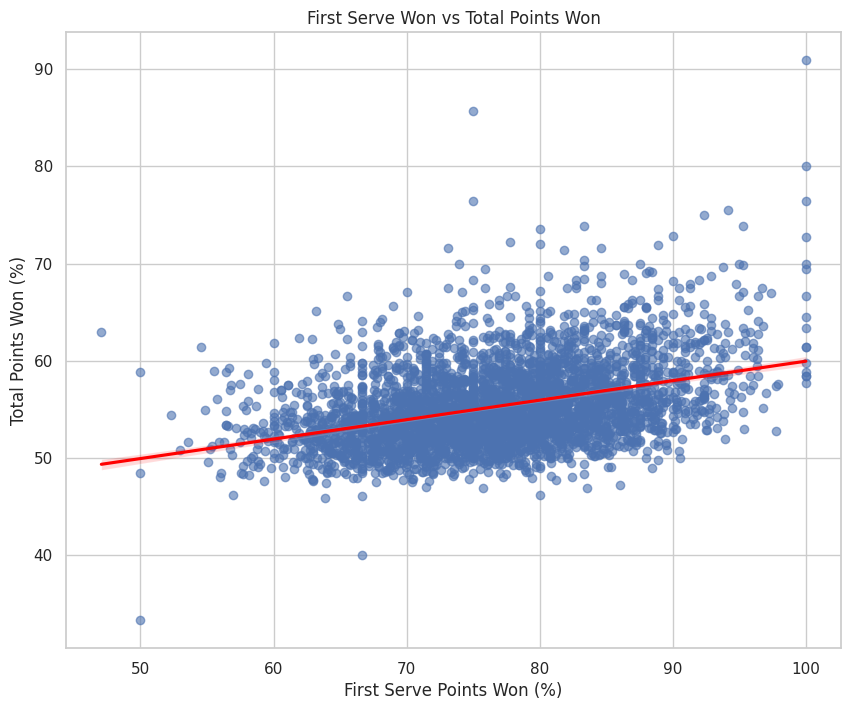

In [52]:
# ✅ Compute percentage columns
atp_tennis['FirstServeWon'] = (
    atp_tennis['winner_first_serve_points_won'] / atp_tennis['winner_first_serve_points_total']
) * 100

atp_tennis['TotalPointsWon'] = (
    atp_tennis['winner_total_points_won'] / atp_tennis['winner_total_points_total']
) * 100

# ✅ Plot
plt.figure(figsize=(10, 8))
sns.regplot(
    data=atp_tennis,
    x='FirstServeWon',
    y='TotalPointsWon',
    scatter_kws={'alpha': 0.6},
    line_kws={'color': 'red'}
)
plt.title("First Serve Won vs Total Points Won")
plt.xlabel("First Serve Points Won (%)")
plt.ylabel("Total Points Won (%)")
plt.show()

In [54]:
print("""
Recommendation:
This plot and correlation suggest that players who win more first serve points
tend to win more total points as the dots are tightly clustered around the line implying a strong correlation so it is important to go through serve training!
A social justice perspective is that equal access to quality serve coaching
could help level the playing field for players from underprivile""")


Recommendation:
This plot and correlation suggest that players who win more first serve points
tend to win more total points as the dots are tightly clustered around the line implying a strong correlation so it is important to go through serve training!
A social justice perspective is that equal access to quality serve coaching
could help level the playing field for players from underprivile
